# Perceptron as Logical Operator

## What is a Perceptron?

<p>
In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.</p><pre>
                                                                                        -wiki</pre>

<p> In simple words, <strong>Perceptron is a Computational Unit</strong>  (or simply a function) which takes in set of inputs and gives out the result. </p>

![Perceptron](https://cdn-images-1.medium.com/max/1600/1*-JtN9TWuoZMz7z9QKbT85A.png)


<p> The role of perceptron is to find a function which will <strong>approximately satisfy all the given data</strong>.
Lets say X<sub>1</sub> = (x<sub>11</sub>, x<sub>12</sub>, x<sub>13</sub>) are one of out data in a set of data X =(X<sub>1</sub>, X<sub>2</sub>, ..., X<sub>n</sub>).

So we totally have n datas, and each data have 3 points X<sub>i</sub> = (x<sub>i1</sub>, x<sub>i2</sub>, x<sub>i3</sub>).<br>
The result/answer of each data(X<sub>i</sub>) is given by y<sub>i</sub> 
<p>
    
<p>Here the objective of a perceptron is to find a function f(X) = y.
ie: the function f , has to satisfy all the points of X =(X<sub>1</sub>, X<sub>2</sub>, ..., X<sub>n</sub>).
    
f(X<sub>1</sub>) = y<sub>1</sub><br>
f(X<sub>2</sub>) = y<sub>2</sub><br>
.<br>
.<br>
f(X<sub>n</sub>) = y<sub>n</sub>

</p>

## Now we will see how to find f , so that it satisfies all f(X<sub>i</sub>) = y<sub>i</sub> using perceptron as logical operators as example

What ever our target function/prediction is , we need to follow certain steps to get the prediction function:<br>
1. assign random function lets say for our task we have 2D data. so we randomly allot our function <br><strong>f(X) = W<sub>1</sub>x<sub>1</sub> + W<sub>2</sub>x<sub>2</sub> + b  </strong>,    W<sub>1</sub>, W<sub>2</sub>, b are some random Real Value.<br><br>
Now , we have a random function, But we can see it's a linear function.The actual function which will fit the data may be non-linear also. <br>
So, we apply an activation function on top of out function to make it non-linear.<br>
<strong>z = f(X) = W<sub>1</sub>x<sub>1</sub> + W<sub>2</sub>x<sub>2</sub> + b  </strong>
by applying some non linear function$$\sigma(z)$$<br>

2. Now , we have a non linear function $$a = \sigma(z)$$.
    <br> Now let us see how good id our random inital function in classifyingout data.<br> Ofcourse it is not going to give a good fit, So now we apply <strong> Gradient Descent</strong> to the function and change  W<sub>1</sub>, W<sub>2</sub>, b such that the function z = f(x) fits the given data well.

3. But how do we know how good is the function in fitting the data, we cant visualize it everytime. So we have to decide some metric L(y, a). 
<br> Our goal is to choose best W<sub>1</sub>, W<sub>2</sub>, b such that L(y,a) is the lowest. So we apply gradient descent here to reduce L(y,a).

## AND Operator

You should be knowing AND operator of <strong>X&Y or X.Y</strong>
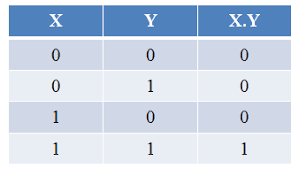

Let us try to implement AND with the perceptron, with the data in the above table.

### Data for AND 

In [10]:
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
print('X is \n',X)

X is 
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [162]:
y = np.array([[0], [0], [0], [1]])
print('y is ', y)

y is  [[0]
 [0]
 [0]
 [1]]


### Visualize data

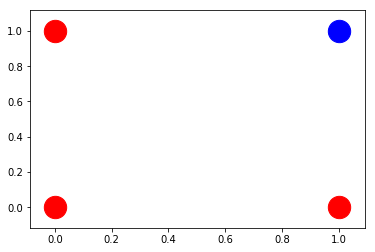

In [163]:
import matplotlib.pyplot as plt
for i,x in enumerate(X):
    if y[i]:
        color = 'blue'
    else:
        color = 'red'
    plt.scatter(x[0], x[1], color=color, s=500)
plt.show()

### Initializing random Weights and biases

In [ ]:
def initialize_weight_bias(X, y):
    W = np.random.randn(X.shape[1],1 ) * 0.5
    b = np.random.randn(1,1)
    return W, b

### Defining loss function

In [231]:
def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -1*np.sum(Y*np.log(P)+(1-Y)*np.log(1-P))

def loss(y, a):
    return cross_entropy(y,a)

### Forward Pass

In [208]:
def forward(W, b, X):
    return np.dot(X, W) + b

### Activation functions

In [185]:
# sigmoid

def activation(z): 
    return 1/(1+np.exp(-z))

#softmax (for multi class classification)

def softmax(L):
    return np.exp(L)/np.sum(np.exp(L))

### Backward Pass

In [191]:
def backward(X, a, y):
    return np.dot(X.T, a-y), (a-y).mean()

### Training Loop

Epoch 10 : loss = 1.8509835972300421
Epoch 20 : loss = 1.5077946334264214
Epoch 30 : loss = 1.2845086287430412
Epoch 40 : loss = 1.125456484621559
Epoch 50 : loss = 1.0049212981450053
Epoch 60 : loss = 0.9095398313206763
Epoch 70 : loss = 0.831669188006102
Epoch 80 : loss = 0.7665927799388561
Epoch 90 : loss = 0.7112191210135004
Epoch 100 : loss = 0.6634219545926066
Epoch 110 : loss = 0.621680892499856
Epoch 120 : loss = 0.5848736644510184
Epoch 130 : loss = 0.5521498095790659
Epoch 140 : loss = 0.5228505237308816
Epoch 150 : loss = 0.4964558967880248
Epoch 160 : loss = 0.4725490647298136
Epoch 170 : loss = 0.45079117663691176
Epoch 180 : loss = 0.4309034904332092
Epoch 190 : loss = 0.41265429549995813
Epoch 200 : loss = 0.39584918226992755


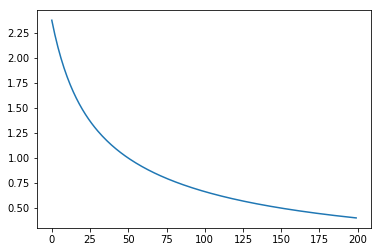

In [245]:
learning_rate = 0.5
epochs = 200

W, b = initialize_weight_bias(X, y)

losses=[]
for i in range(epochs):
    z = forward(W, b, X)
    a = activation(z)
    l = loss(y, a)
    if (i+1)%10 == 0 :
        print('Epoch {} : loss = {}'.format(i+1, l))
    dw, db = backward(X, a, y)
    W = W - learning_rate * dw
    b = b - learning_rate * db
    losses.append(l)
plt.plot(losses) 

### Visualizing the trained weights and biases

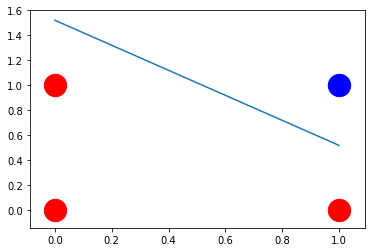

In [246]:
xl = np.linspace(0, 1, 100)
slope = -float(W[1])/float(W[0])
intercept = -float(b)/float(W[0])
line = [slope * i + intercept for i in xl]

for i,x in enumerate(X):
    if y[i]:
        color = 'blue'
    else:
        color = 'red'
    plt.scatter(x[0], x[1], color=color, s=500)
    
plt.plot(xl, line) 

### Trained AND Operator

In [255]:
def AND(X):
    if forward(W, b, X) > 0:
        return 1
    else:
        return 0

In [256]:
AND([0,0])

0

In [257]:
AND([0,1])

0

In [258]:
AND([1,0])

0

In [259]:
AND([1,1])

1

## We trained a AND function without even telling the code that AND is a.b or a&b , just by giving it data.

## OR , NOT, XOR Operator

Any operations can be trained using the above code, just by changing X, y.